# Prueba Jr Data Analyst TalentPitch

### 1. Primer Paso, web scraping para obtener 10000 registros

Este paso suele demorar un tiempo porque además de recolectar los datos está pasando a la siguiente página para obtener mas datos.
Para utilizar este algoritmo se debe descargar el chomedriver.exe de su versión de chrome actual

In [68]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
import time
import os
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
import pandas as pd
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

options = Options()
options.headless = True
path=os.getcwd()
driver = webdriver.Chrome('{}chromedriver.exe'.format(path))
wait = WebDriverWait(driver, 5)

driver.get("https://www.elempleo.com/co/ofertas-empleo/")
time.sleep(5)


list_Cargos=[]
list_Empresa=[]
list_Ciudades=[]
list_Salarios=[]
list_Publicacion=[]
list_url=[]


btn_cookies=driver.find_element(By.XPATH,value='//a[@class="btn btn-default submit-politics btnAcceptPolicyNavigationCO"]')
btn_cookies.click()

time.sleep(5)

for i in range(500):
    
    Cargos = driver.find_elements(By.XPATH,value="//a[@class='text-ellipsis js-offer-title']")
    cargo=[a.text for a in Cargos]

    Empresas = driver.find_elements(By.XPATH, '//span[@class="info-company-name js-offer-company"]')
    Empresa = [b.text for b in Empresas]

    Salarios = driver.find_elements(By.XPATH, '//span[@class="text-primary info-salary js-offer-salary"]')
    Salario = [c.text for c in Salarios]
    
    Ciudades = driver.find_elements(By.XPATH, '//span[@class="info-city js-offer-city"]')
    Ciudad = [d.text for d in Ciudades]

    Publicaciones = driver.find_elements(By.XPATH, '//span[@class="info-publish-date pull-right js-offer-date"]')
    Publicacion = [e.text for e in Publicaciones]
    
    urls = driver.find_elements(By.XPATH,value="//a[@class='text-ellipsis js-offer-title']")
    url = [c.get_attribute('href') for c in urls]
    
    list_Cargos.extend(cargo)
    list_Empresa.extend(Empresa)
    list_Salarios.extend(Salario)
    list_Ciudades.extend(Ciudad)
    list_url.extend(url)

    try:
            btn_siguiente=driver.find_element(By.XPATH,value='//a[@class="js-btn-next"]')
            btn_siguiente.click()
    except:
        break

    time.sleep(10)

    if len(list_Ciudades)==10000:
        break


df=pd.DataFrame({"Empresas":list_Empresa,"Cargos":list_Cargos,"Salarios":list_Salarios,"Ciudades":list_Ciudades,"Urls":list_url}) 

<ipython-input-68-b79daa6fb665>:15: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('{}\chromedriver_win32\chromedriver.exe'.format(path))


In [71]:
## Filas y Columnas del dataset
df.shape

(10000, 5)

In [72]:
# Primeros 5 registros
df.head()

,Empresas,Cargos,Salarios,Ciudades,Urls
0,Empresa confidencial,Enfermero jefe -,"$2 a $2,5 millones",Bogotá,https://www.elempleo.com/co/ofertas-trabajo/en...
1,Arturo Calle,Auxiliar punto de venta,"$1 a $1,5 millones",Bogotá,https://www.elempleo.com/co/ofertas-trabajo/au...
2,WEG,Auxiliar mecánico,"$1 a $1,5 millones",Bogotá,https://www.elempleo.com/co/ofertas-trabajo/au...
3,Empresa confidencial,Profesional comercial y de mercadeo,"$2,5 a $3 millones",Bogotá,https://www.elempleo.com/co/ofertas-trabajo/pr...
4,Empresa confidencial,Analista de datos,Salario a convenir,Bogotá,https://www.elempleo.com/co/ofertas-trabajo/an...


In [73]:
# Guardar la data de manera local en forma de csv
df.to_csv('DatasetLinks.csv')

## Grafica Número de cargos por salario

Text(-2.575000000000003, 0.5, 'Total')

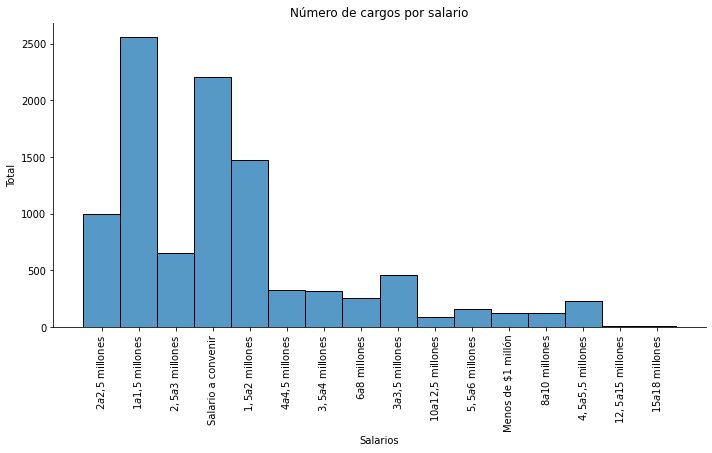

In [19]:
sns.displot(df.Salarios,discrete=True,aspect=2,height=5,kind="hist").set(title='Número de cargos por salario')
plt.xticks(rotation=90)
plt.ylabel('Total')

#### Análisis de la grafica 

##### Se puede observar que en la grafica que a mayores salarios menor será la cantidad de ofertas de empleo excepto por salarios menores al 1 millón de pesos. Por otro lado, los salarios que van entre 1 y 3 millones son los mas ofertados junto con los salarios a convenir. 


## Grafica Número de cargos por ciudad

### Grafico de barras

Text(0, 0.5, 'Total')

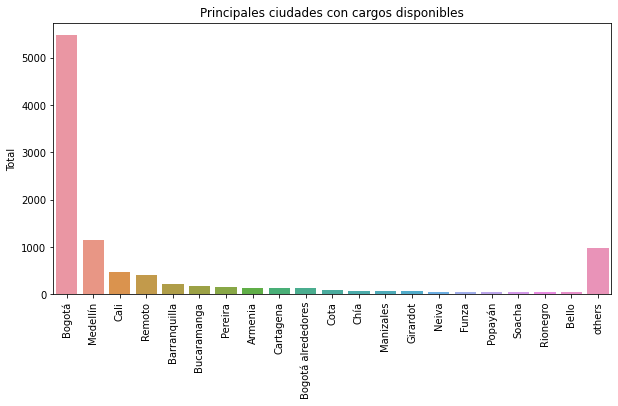

In [22]:
## 20 ciudades con mas reclutamiento en colombia
top_20 = df['Ciudades'].value_counts().head(20)
top_20 = top_20.append(pd.Series({"others": df['Ciudades'].value_counts()[20:].sum()}))

plt.figure(figsize=(10,5))
sns.barplot(x=top_20.index, y=top_20.values).set(title='Principales ciudades con cargos disponibles')
plt.xticks(rotation=90)
plt.ylabel('Total')

### Grafico tipo torta

([<matplotlib.patches.Wedge at 0x15a7f7a59a0>,
 [Text(-0.16114720061021517, 1.0881321517791354, 'Bogotá'),
  Text(-0.8729690160780972, -0.6692720649837696, 'Medellín'),
  Text(-0.43813082381033386, -1.0089803671168625, 'Cali'),
  Text(-0.14643334631929744, -1.0902097390345276, 'Remoto'),
  Text(0.07079407595204851, -1.0977195446971397, 'Barranquilla'),
  Text(0.2054406202643689, -1.0806452477781001, 'Bucaramanga'),
  Text(0.31219609622961897, -1.0547670821081718, 'Pereira'),
  Text(0.40590086641003, -1.022371990347734, 'Armenia'),
  Text(0.4932216471538793, -0.9832255116598707, 'Cartagena'),
  Text(0.5723895005522295, -0.939345655048007, 'Bogotá alrededores'),
  Text(0.9697058849056701, -0.5192980808546394, 'others')],
 [Text(-0.08789847306011736, 0.5935266282431647, '54.7%'),
  Text(-0.47616491786078025, -0.365057489991147, '11.5%'),
  Text(-0.23898044935109114, -0.5503529275182885, '4.7%'),
  Text(-0.07987273435598041, -0.5946598576551968, '4.1%'),
  Text(0.03861495051929918, -0.5987

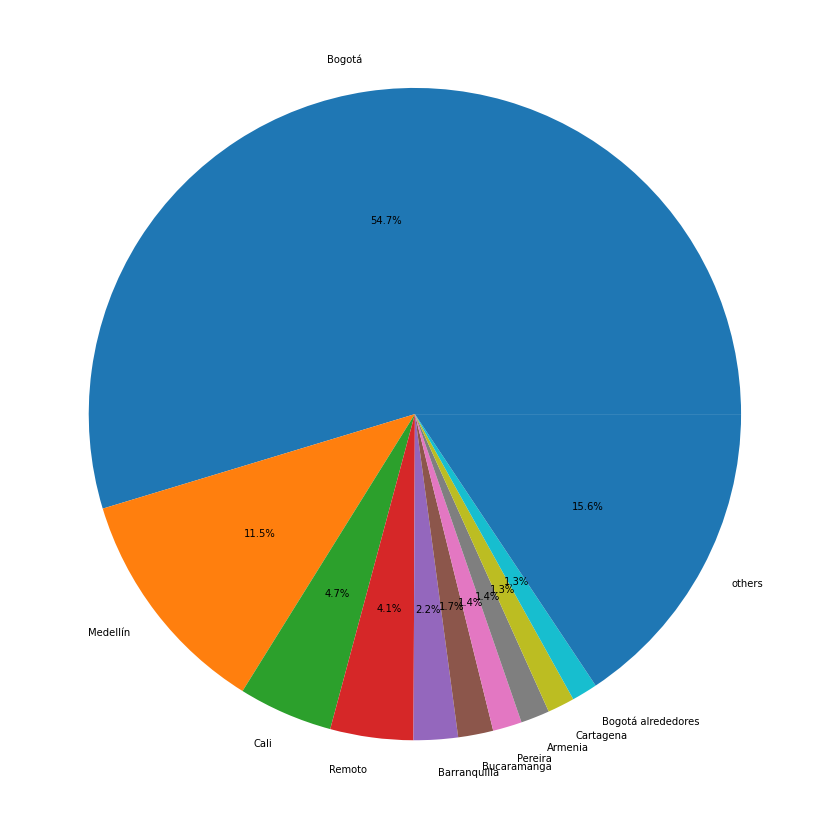

In [35]:
top_10 = df['Ciudades'].value_counts().head(10)
top_10 = top_10.append(pd.Series({"others": df['Ciudades'].value_counts()[10:].sum()}))


plt.figure(figsize=(15, 15))
plt.pie(top_10.values, labels=top_10.index,autopct='%1.1f%%')

### Análisis de las graficas

##### Se puede observar en ambas graficas que Bogotá domina las ofertas laborales en todo el país con un 54% con respecto a las totales (aproximadamente 5400). Por otro lado, los trabajos remotos han tenido gran auge, superando en ofertas laborales a las presenciales en ciudades como Barranquilla, Bucaramanga, Pereira, entre otras. 
